In [24]:
import matplotlib.pyplot as plt
import numpy as np
from astroML.datasets import generate_mu_z
from sklearn.linear_model import LinearRegression
from astroML.linear_model import PolynomialRegression

## Time to get your hands dirty! Supernova distances and redshifts (part 1)

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.

This is a [Nobel prize](https://www.nobelprize.org/prizes/physics/2011/riess/facts/) plot by [Riess et al](https://iopscience.iop.org/article/10.1086/300499)

![Screen%20Shot%202022-05-01%20at%2010.48.48.png](attachment:Screen%20Shot%202022-05-01%20at%2010.48.48.png)

Let's recall the definition of magnitude and the distance modulus (ah! the astronomers...)

$$
\mu = m-M =  5 \log_{10}\left(\frac{d_L}{\rm pc}\right) - 5
$$

Here is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored. 

####  Tasks

- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of  polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?

#### If you have time (or later at home...)

- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

(35.0, 50.0)

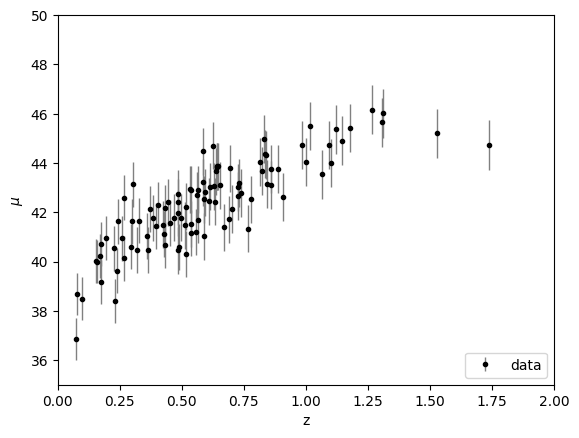

In [13]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

## linear

39.56505554722625 [4.64711848]


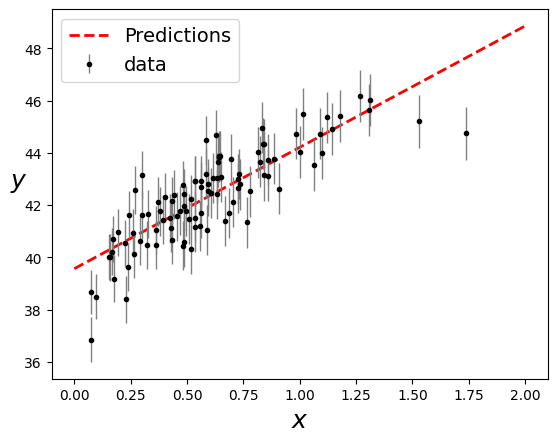

In [30]:
#X_grid = np.array([[0], [2]]) #like X_grid, but just with the endpoints
X_grid_1d = np.linspace(0,2, 100)
X_grid = X_grid[:, np.newaxis]
X = z_sample[:, np.newaxis]
y = mu_sample
lin_reg = LinearRegression()
lin_reg.fit(X, y, sample_weight=1.0)

theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_

print(theta0, theta1)
y_pred2 = lin_reg.predict(X_grid)


y_pred = theta0 + theta1*X_grid  # Complete 

plt.plot(X_grid, y_pred, "r--", linewidth=2, label="Predictions")
plt.errorbar(X, y, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()


# polynomial

[38.49130243  8.23905057 -2.20391808 -0.15168104]


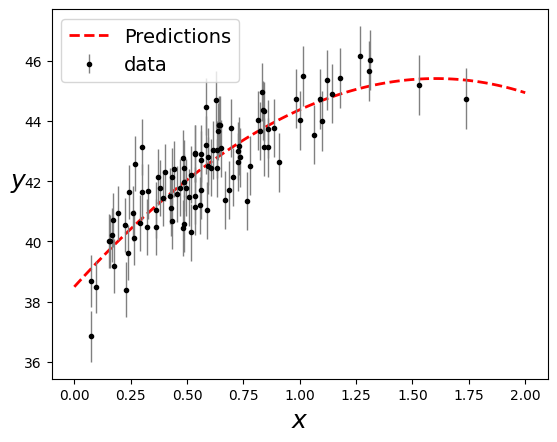

In [33]:
# Typical call
from astroML.linear_model import PolynomialRegression


degree = 3
model = PolynomialRegression(degree) # fit 3rd degree polynomial
model.fit(X, y)

y_pred = model.predict(X_grid)
n_constraints = degree + 1

#print(X_grid,y_pred)
print(model.coef_)



plt.plot(X_grid, y_pred, "r--", linewidth=2, label="Predictions")
plt.errorbar(X, y, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

# Let's do cross validation now!